In [1]:
!nvidia-smi

Fri Jan 31 05:56:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ismPTbZcXqYgum85Mbnn")
project = rf.workspace("corn-leaf-disease").project("corn_disease-vsprz")
version = project.version(4)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to corn_disease-4 in yolov8:: 100%|██████████| 9860/9860 [00:02<00:00, 3804.21it/s]


In [4]:
import yaml

# Corrected class weights (matching the order of 'names' in YAML)
class_weights = [
    1.092,  # Brown Spot
    0.744,  # Corn Rust
    1.130,  # Corn Smut
    1.297,  # Downy Mildew
    1.041,  # Grey Leaf Spot
    0.783,  # Healthy
    1.184   # Leaf Blight
]

# File path
file_path = '/content/corn_disease-4/data.yaml'

# Load the YAML content
with open(file_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Update class weights with correct order
yaml_data['cls_weights'] = class_weights

# Save the updated YAML file
with open(file_path, 'w') as file:
    yaml.dump(yaml_data, file)

print("YAML file updated successfully!")

# Verify the updated content
with open(file_path, 'r') as file:
    print("Updated YAML Content:")
    print(file.read())


YAML file updated successfully!
Updated YAML Content:
cls_weights:
- 1.092
- 0.744
- 1.13
- 1.297
- 1.041
- 0.783
- 1.184
names:
- brown_spot
- corn_rust
- corn_smut
- downy_mildew
- grey_leaf_spot
- healthy
- leaf_blight
nc: 7
roboflow:
  license: CC BY 4.0
  project: corn_disease-vsprz
  url: https://universe.roboflow.com/corn-leaf-disease/corn_disease-vsprz/dataset/4
  version: 4
  workspace: corn-leaf-disease
test: ../test/images
train: ../train/images
val: ../valid/images



In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/corn_disease-4/data.yaml epochs=100 imgsz=640 batch=16

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/corn_disease-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [8]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/corn_disease-4/valid/images save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

image 1/332 /content/corn_disease-4/valid/images/0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp-9352_270deg_JPG_jpg.rf.38d0570c6ceef4c62140b97885a7058d.jpg: 640x640 1 grey_leaf_spot, 9.7ms
image 2/332 /content/corn_disease-4/valid/images/0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp-9352_JPG_jpg.rf.72ab59c8abe0a0951f2d692c5fb81372.jpg: 640x640 1 grey_leaf_spot, 7.5ms
image 3/332 /content/corn_disease-4/valid/images/0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp-9352_JPG_jpg.rf.7a8f225dfce7c56383b3870f8339d4c1.jpg: 640x640 1 grey_leaf_spot, 7.4ms
image 4/332 /content/corn_disease-4/valid/images/10ccc_jpg.rf.b0e81493ca8498ab64ef4cef48ac1d05.jpg: 640x640 1 brown_spot, 7.4ms
image 5/332 /content/corn_disease-4/valid/images/10ccccc_jpg.rf.6ab712bf528054d04422069f93d90e6a.jpg: 640x640 1 downy_mildew, 7.4ms
image 6/332 /content/co

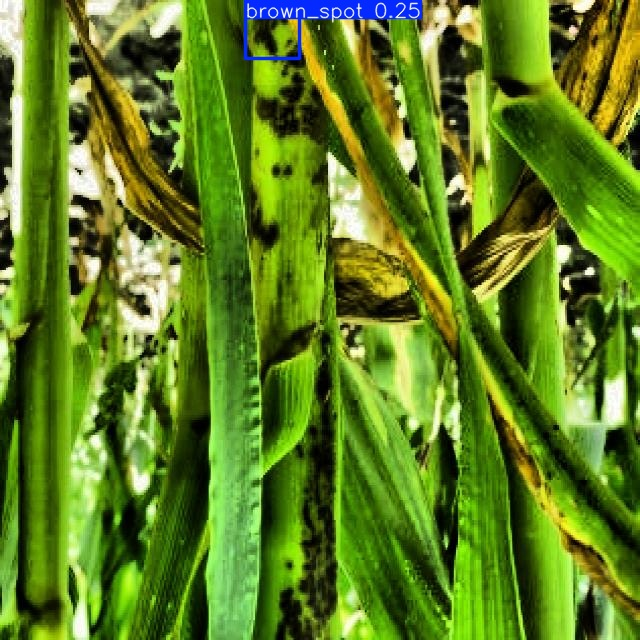

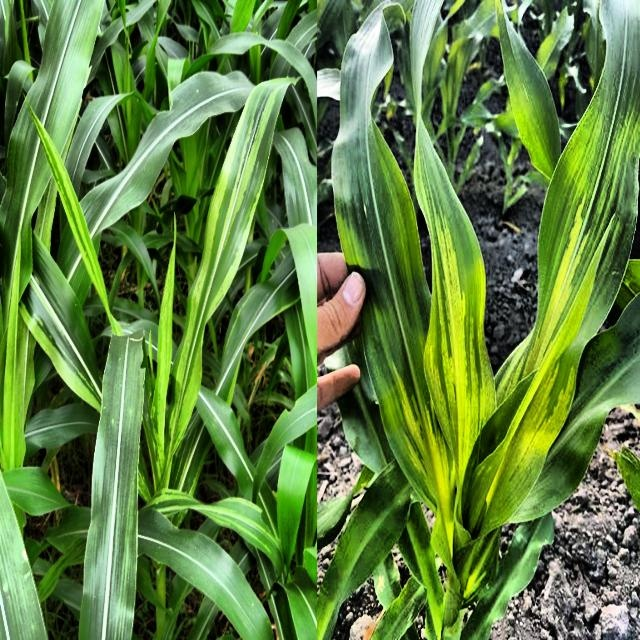

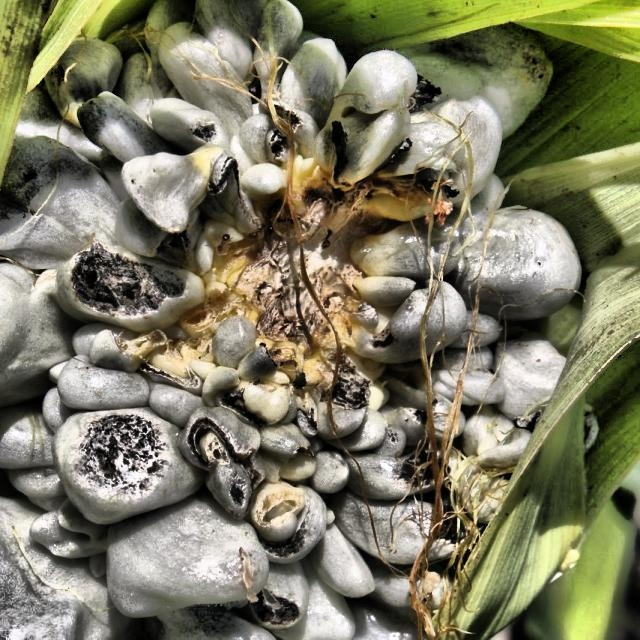

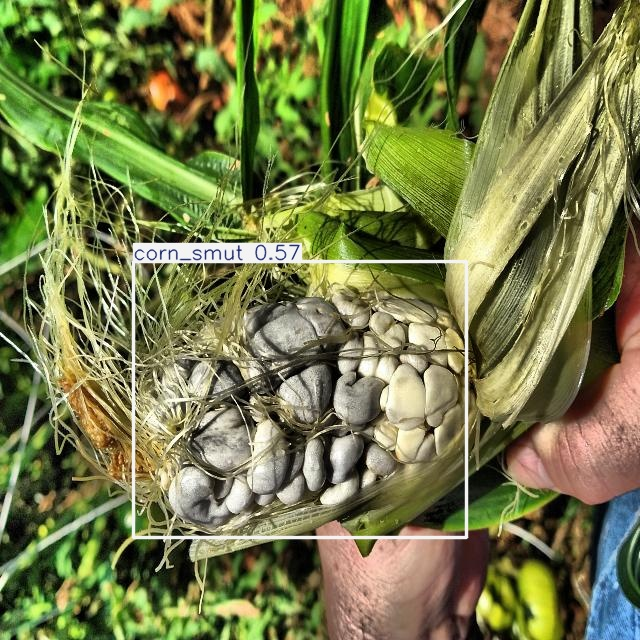

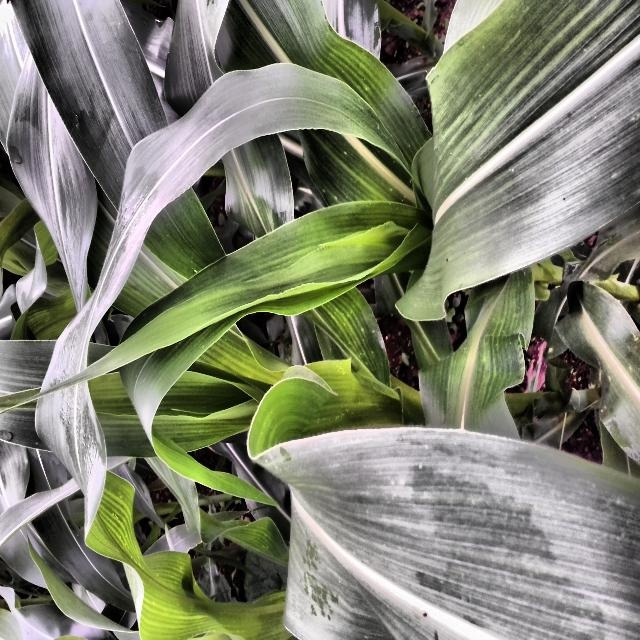

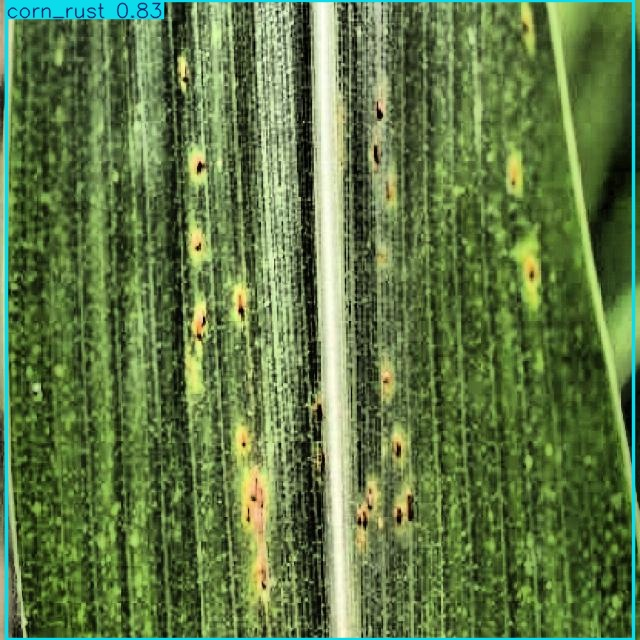

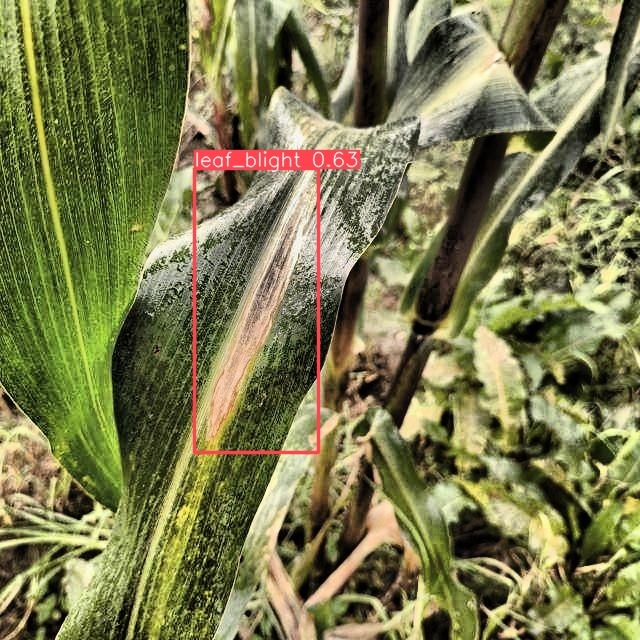

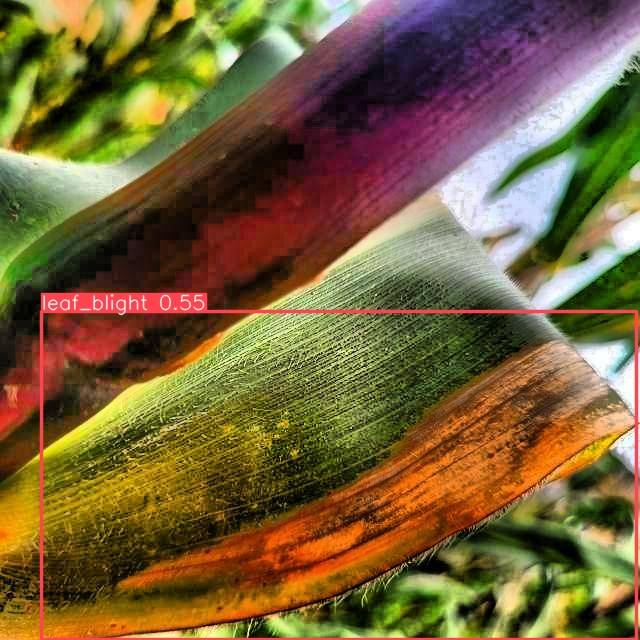

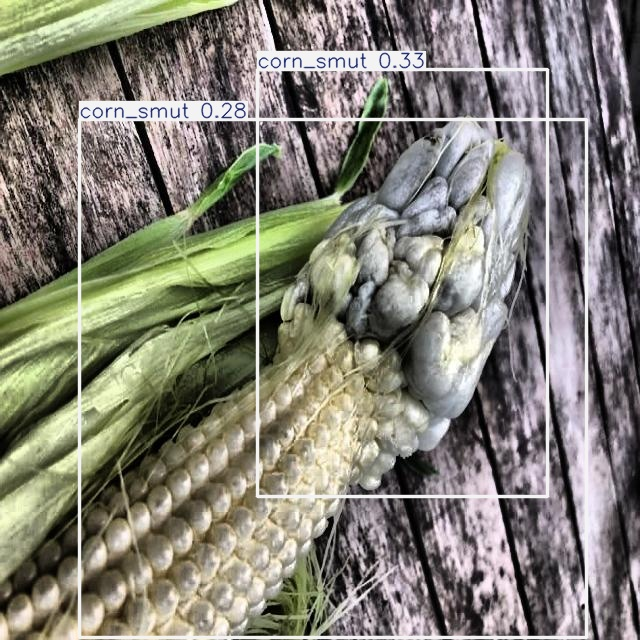

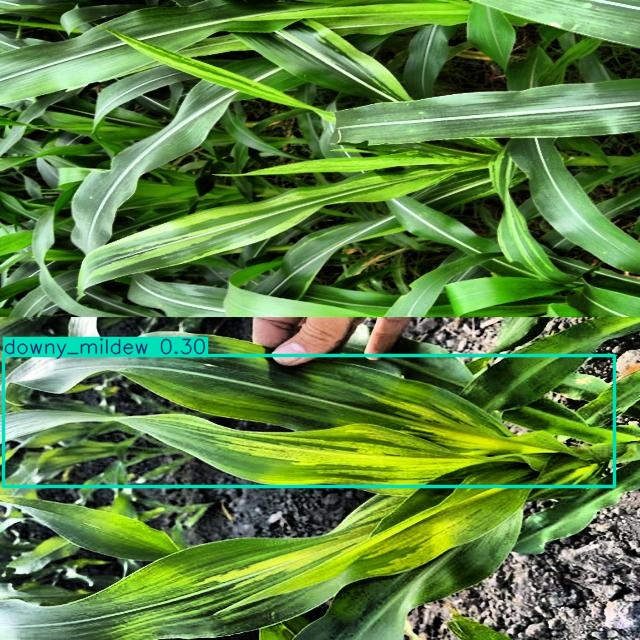

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [13]:

!cp /content/runs/detect/train/weights/best.pt /content/my_model/corn_disease_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip plant_disease_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
updating: plant_disease_model.pt (deflated 20%)
updating: train/ (stored 0%)
updating: train/weights/ (stored 0%)
updating: train/weights/best.pt (deflated 20%)
updating: train/weights/last.pt (deflated 20%)
updating: train/train_batch2.jpg (deflated 1%)
updating: train/train_batch1.jpg (deflated 1%)
updating: train/results.csv (deflated 60%)
updating: train/events.out.tfevents.1738304462.7b8250875fdb.7684.0 (deflated 91%)
updating: train/labels_correlogram.jpg (deflated 34%)
updating: train/train_batch0.jpg (deflated 1%)
updating: train/labels.jpg (deflated 20%)
updating: train/args.yaml (deflated 53%)
/content
